## 변수를 파일로 저장하기

In [1]:
import tensorflow as tf

In [2]:
b1=tf.Variable(2.0,name='bias')
init=tf.global_variables_initializer()

In [3]:
saver=tf.train.Saver()

In [4]:
sess=tf.Session()
sess.run(init)

In [5]:
print('save test bias',sess.run(b1))

save test bias 2.0


In [7]:
save_path=saver.save(sess,'./saver_bias/bias.ckpt')
print('Model saved in file: %s' % save_path)

Model saved in file: ./saver_bias/bias.ckpt


## 파일에서 변수 읽어오기

In [1]:
import tensorflow as tf

In [2]:
b1=tf.Variable(0.0,name='bias')
saver=tf.train.Saver()
sess=tf.Session() #세션준비,init을 하지 않음
ckpt=tf.train.get_checkpoint_state('./saver_bias/')

In [3]:
if tf.train.checkpoint_exists(ckpt.model_checkpoint_path):
    saver.restore(sess,ckpt.model_checkpoint_path)
    print('variable is restored')

print('bias:',sess.run(b1))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./saver_bias/bias.ckpt
variable is restored
bias: 2.0


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def shuffle_data(x_train,y_train):
    temp_index=np.arange(len(x_train))
    np.random.shuffle(temp_index)
    
    x_temp=np.zeros(x_train.shape)
    y_temp=np.zeros(y_train.shape)
    x_temp=x_train[temp_index]
    y_temp=y_train[temp_index]
    
    return x_temp,y_temp

No handles with labels found to put in legend.


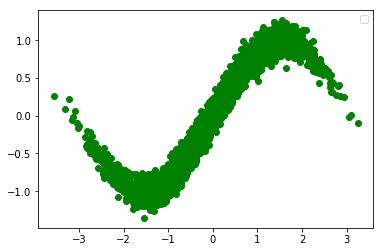

failed to restore. init graph


No handles with labels found to put in legend.


step= 5000, Loss value=0.008447
Model saved in file: /tmp/nn_sin_model.ckpt-5000


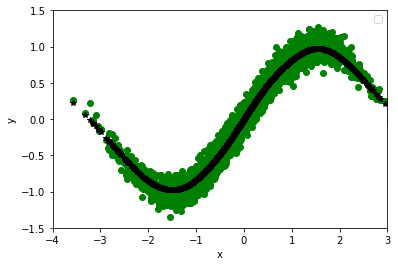

In [4]:
def main():
    num_points=5000
    vector_set=[]
    for i in range(num_points):
        x1=np.random.normal(.0,1.0)
        y1=np.sin(x1)+np.random.normal(0,0.1)
        vector_set.append([x1,y1])
        
    x_data=[v[0] for v in vector_set]
    y_data=[v[1] for v in vector_set]
    
    plt.plot(x_data,y_data,'go')
    plt.legend()
    plt.show()
    
    batch_size=100
    batch_num=int(len(x_data)/batch_size)
    
    x_data=np.reshape(x_data,[len(x_data),1])
    y_data=np.reshape(y_data,[len(y_data),1])
    
    input_data=tf.placeholder(tf.float32,shape=[None,1])
    output_data=tf.placeholder(tf.float32,shape=[None,1])
    
    W1=tf.Variable(tf.random_uniform([1,5],-1.0,1.0),name='w1')
    W2=tf.Variable(tf.random_uniform([5,3],-1.0,1.0),name='w2')
    W_out=tf.Variable(tf.random_uniform([3,1],-1.0,1.0),name='wo')
    
    hidden1=tf.nn.sigmoid(tf.matmul(input_data,W1))
    hidden2=tf.nn.sigmoid(tf.matmul(hidden1,W2))    
    output=tf.matmul(hidden2,W_out,name='output')
    
    loss=tf.reduce_mean(tf.square(output-output_data))
    optimizer=tf.train.AdamOptimizer(0.01)
    train=optimizer.minimize(loss)
    
    init=tf.global_variables_initializer()
    saver=tf.train.Saver() #모든 변수의 저장과 복구를 위한 오퍼레이션 추가
    sess=tf.Session()
    
    ckpt=tf.train.get_checkpoint_state('/tmp')
    if(ckpt!=None) and tf.train.checkpoint_state(ckpt.model_checkpoint_path):
        saver.restore(sess,ckpt.model_checkpoint_path)
        print('variable is restored')
    else:
        print('failed to restore. init graph')
        sess.run(init)
    
    for step in range(5001):
        index=0
        x_data,y_data=shuffle_data(x_data,y_data)
        for batch_iter in range(batch_num-1):
            feed_dict={input_data:x_data[index:index+batch_size],
                      output_data:y_data[index:index+batch_size]}
            sess.run(train,feed_dict=feed_dict)
            index +=batch_size
            
        #100회까지는 10마다 1번,나머지는 100번에 1번
    if (step%100==0 or (step<100 and step%10==0)):
        print('step=%5d, Loss value=%f'%(step,sess.run(loss,feed_dict=feed_dict)))
    
        save_path=saver.save(sess,'/tmp/nn_sin_model.ckpt',global_step=step)
        print('Model saved in file: %s' %save_path)
        
    feed_dict={input_data:x_data}
    
    plt.plot(x_data,y_data,'go')
    
    plt.plot(x_data,sess.run(output,feed_dict=feed_dict), 'k*')
    plt.xlabel('x')
    plt.xlim(-4,3)
    plt.ylabel('y')
    plt.ylim(-1.5,1.5)
    plt.legend()
    plt.show()
    
if __name__=='__main__':
    main()